In [1]:
#author = Michał Iskra

import math
import numpy as np


def x_min(gradient, lrn_rate, stop_value, *start_pos):

  #gradient - gradient funkcji której minimum szukamy
  #lrn_rate - learning rate, ułamek przez jaki mnożony jest wynik gradientu, w celu uzyskania kroku
  #stop_value - warunek do zatrzymania pętli algorytmu, obliczony jako odległość pomiędzy poprzednią pozycją a najnowszą
  #*start_pos - zestaw danych wejściowych opisujących pozycję od której algorytm zaczyna swoje wyliczenia

  cur_pos = np.asarray(start_pos) #ustawienie pozycji startowej

  pos_list = []

  while True:
    prv_pos = cur_pos.copy()  #skopiowanie pozycji startowej, żeby nie była ta sama tablica
    for i in range(len(cur_pos)):   
      cur_pos[i] = prv_pos[i] - lrn_rate*gradient[i](prv_pos)    #odjęcie kroków od poszczególnych współrzędnych wyliczane z gradientu
    
    pos_list.append(prv_pos) #na rzecz eksperymentu

    if(np.linalg.norm(np.subtract(cur_pos,prv_pos))<=stop_value): #warunek konieczny do zatrzymania pętli, czyli długość wektora złożonego z przesunięć norm = magnitude
      break

  return cur_pos, pos_list


**1. Testowanie algorytmu dla funkcji 1: f(x) = x^2 w zakresie:** 

1.1   Zależność pomiędzy rozmiarem przyjętego kroku (ustawianego za pomocą  lrn_rate), a ilością iteracji algorytmu w celu znalezienia minimum  
1.2.   Zależność pomiędzy wyborem punktu startowego, a ilością iteracji algorytmu w celu znalezienia minimum




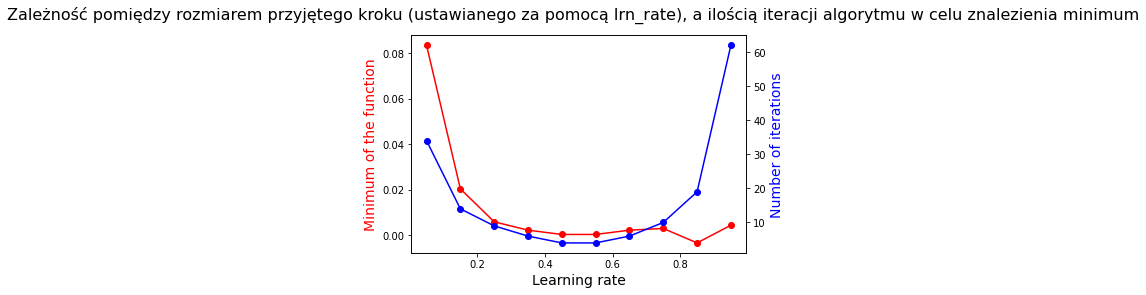

In [20]:
import matplotlib.pyplot as plt

grd_f_1 = lambda pos:2*pos[0] #gradient funkcji f1

#eksperyment 1.1

list = [[],[],[]]
for i in range(10):
  min, path = x_min([grd_f_1], 0.1*i+0.05, 0.01, *[3.0])
  list[0].append(0.1*i+0.05)
  list[1].append(min)
  list[2].append(len(path))

fig,ax = plt.subplots()
ax.plot(list[0], list[1], color="red", marker="o")
ax.set_xlabel("Learning rate",fontsize=14)
ax.set_ylabel("Minimum of the function",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(list[0], list[2],color="blue",marker="o")
ax2.set_ylabel("Number of iterations",color="blue",fontsize=14)
fig.suptitle('Zależność pomiędzy rozmiarem przyjętego kroku (ustawianego za pomocą lrn_rate), a ilością iteracji algorytmu w celu znalezienia minimum', fontsize=16)
plt.show()

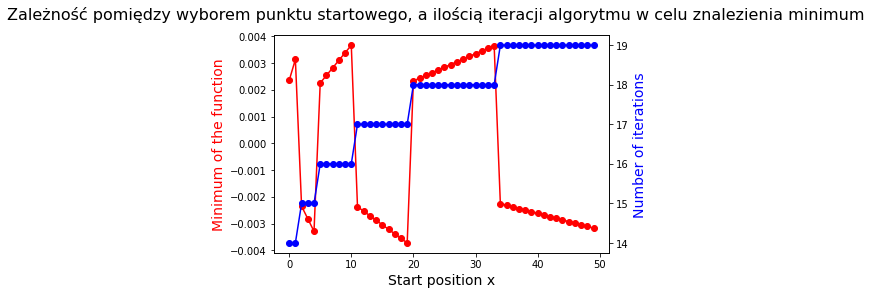

In [21]:
#eksperyment 1.2

list = [[],[],[]]
for i in range(50):
  min, path = x_min([grd_f_1], 0.8, 0.01, *[3.0+i])
  list[0].append(i)
  list[1].append(min)
  list[2].append(len(path))


fig,ax = plt.subplots()
ax.plot(list[0], list[1], color="red", marker="o")
ax.set_xlabel("Start position x",fontsize=14)
ax.set_ylabel("Minimum of the function",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(list[0], list[2],color="blue",marker="o")
ax2.set_ylabel("Number of iterations",color="blue",fontsize=14)
fig.suptitle('Zależność pomiędzy wyborem punktu startowego, a ilością iteracji algorytmu w celu znalezienia minimum', fontsize=16)
plt.show()


**2. Testowanie algorytmu dla funkcji 2: (x1 + a)^2 + (x2 − a)^2 − 5*cos(10*((x1 + a2)^2 + (x2 − a)^2)^1/2) w zakresie:** 

2.1.   Zależność pomiędzy rozmiarem przyjętego kroku (ustawianego za pomocą  lrn_rate), a ilością iteracji algorytmu w celu znalezienia minimum  
2.2.   Zależność pomiędzy wyborem punktu startowego, a ilością iteracji algorytmu w celu znalezienia minimum


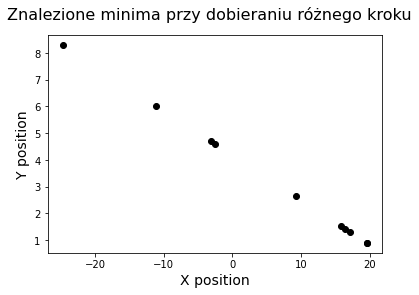

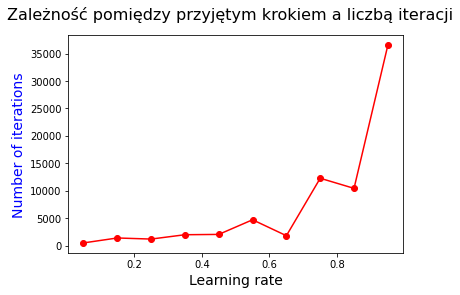

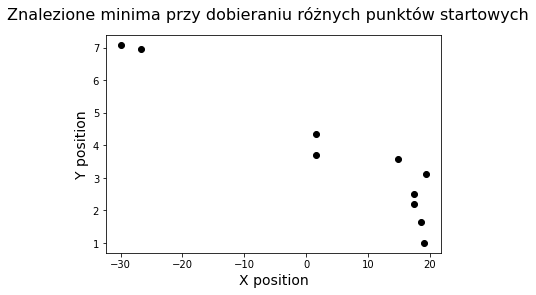

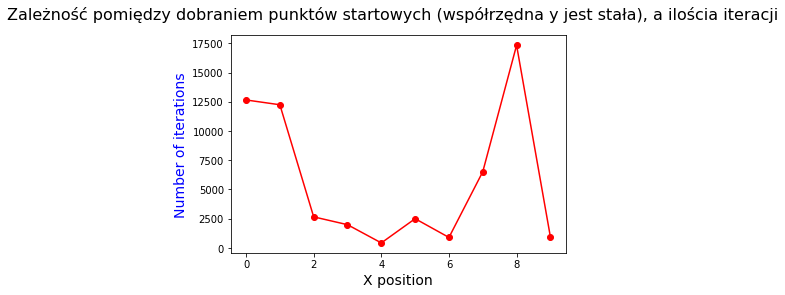

49

In [19]:



#eksperyment 2.1 różne learning rate

sq = lambda pos: math.sqrt((pos[0]+5)**2+(pos[1]-5)**2)
grd_v0 = lambda pos: (pos[0]+5)*(2+50*math.sin(10*sq(pos))/sq(pos))
grd_v1 = lambda pos: (pos[1]-5)*(2+50*math.sin(10*sq(pos))/sq(pos)) 
grd_f_2 = [grd_v0, grd_v1] # wektor gradientu funkcji 2

list = [[],[],[],[]]
for i in range(10):
  min, path = x_min(grd_f_2, 0.1*i+0.05, 0.01, *[1.0,4.0])
  list[0].append(0.1*i+0.05)
  list[1].append(min[0])
  list[2].append(min[1])
  list[3].append(len(path))


fig,ax = plt.subplots()
ax.plot(list[1], list[2], 'o', color='black');
ax.set_xlabel("X position",fontsize=14)
ax.set_ylabel("Y position",color="black",fontsize=14)
fig.suptitle('Znalezione minima przy dobieraniu różnego kroku', fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.plot(list[0], list[3], color="red", marker="o")
ax.set_xlabel("Learning rate",fontsize=14)
ax.set_ylabel("Number of iterations",color="blue",fontsize=14)
fig.suptitle('Zależność pomiędzy przyjętym krokiem a liczbą iteracji', fontsize=16)
plt.show()

#eksperyment 2.2 różne start position

sq = lambda pos: math.sqrt((pos[0]+5)**2+(pos[1]-5)**2)
grd_v0 = lambda pos: (pos[0]+5)*(2+50*math.sin(10*sq(pos))/sq(pos))
grd_v1 = lambda pos: (pos[1]-5)*(2+50*math.sin(10*sq(pos))/sq(pos)) 
grd_f_2 = [grd_v0, grd_v1]

list = [[],[],[],[]]
for i in range(10):
  min, path = x_min(grd_f_2, 0.8, 0.01, *[float(i),4.0])
  list[0].append(float(i))
  list[1].append(min[0])
  list[2].append(min[1])
  list[3].append(len(path))

fig,ax = plt.subplots()
ax.plot(list[1], list[2], 'o', color='black');
ax.set_xlabel("X position",fontsize=14)
ax.set_ylabel("Y position",color="black",fontsize=14)
fig.suptitle('Znalezione minima przy dobieraniu różnych punktów startowych', fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.plot(list[0], list[3], color="red", marker="o")
ax.set_xlabel("X position",fontsize=14)
ax.set_ylabel("Number of iterations",color="blue",fontsize=14)
fig.suptitle('Zależność pomiędzy dobraniem punktów startowych (współrzędna y jest stała), a ilościa iteracji', fontsize=16)
plt.show()

**WNIOSKI**
Analizując powyższe wykresy można dojść do następujących wniosków:

Dla funkcji nr.1.
*   W przypadku funkcji nr.1 learning rate dla jakiego algorytm policzyłby współrzędne minimum w najkrótszym czasie wynosi 0.5. Wraz ze zmniejszaniem bądź zwiększaniem learning rate wzrasta ilość iteracji potrzebnych do wyliczenia minimum. Rozpatrując współrzędną minimum funkcji, w każdym przypadku algorytm wskazuje na wartości zbliżone do 0, co jest zgodne z minimum globalnym funkcji.
*   Wraz ze zmianą współrzędnej x wzrasta ilość iteracji potrzebnych do znalezienia minimum funkcji. Jest to zgodne z intuicją, ponieważ coraz bardziej punkt jest oddalony od minimum globalnego. Wskazywane współrzędne x-owe minimum również są poprawne.

Dla funkcji nr.2
*   Zwiększanie learning rate powoduje zwiększenie ilości iteracji potrzebnych do znalezienia minimum. Jeżeli chodzi o współrzędne (x,y) minimum funkcji wskazania algorytm są różne, co może świadczyć o znajdowaniu wielu minimum lokalnych.
*   Dla różnych pozycji startowych algorytm wyznacza rózżne minima, a wykres ilości iteracji od pozycji nie wykazuje cech które prowadzą do jakichś wniosków. 
Podsumowanie:
Analizując wszystkie wykresy stwierdzono iż funkcja nr.2 posaida wiele minimów lokalnych, dlatego algorytm wskazuje różne punkty, w zależności od współrzędnych startowych jak i różneego rozmiaru kroku.


